In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib
import csv
import warnings
import seaborn as sns
warnings.filterwarnings('ignore') # Disable warnings for now
%matplotlib inline

In [5]:
df_Budget = pd.read_csv("../data/Expense_Budget.csv")

In [6]:
df_Budget.head()

,Service #,Service Name,Fund #,Fund,Fund- # & Name,Dept #,Dept Name,SubDept#,SubDept Name,Service Area,Type,Acct #,Acct Name,Acct Cat,AU All,budgetType,Amount,Year,PerCapita
0,250115,Medicaid Transportation,100,General,100-General,250,Transportation - Human Services,10,Transportation-Human Serv,Human Services,Expense,58900,Expense Transfer,Other Expense,250115-58900,adopted,-2725474,2013,-5.431265
1,175310,Distribution Services,100,General,100-General,175,Facilities,30,Distribution Services,Support Services,Expense,58900,Expense Transfer,Other Expense,175310-58900,adopted,-550000,2013,-1.096028
2,310730,DS-Prison Farm Operation,100,General,100-General,310,Law Enforcement,40,Detention Services,Public Safety,Expense,58900,Expense Transfer,Other Expense,310730-58900,adopted,-140000,2013,-0.278989
3,210130,Child Abuse,100,General,100-General,210,Public Health,10,Community Health,Human Services,Expense,58900,Expense Transfer,Other Expense,210130-58900,adopted,-72160,2013,-0.143799
4,210270,Tobacco Prevention-Youth Proj,100,General,100-General,210,Public Health,10,Community Health,Human Services,Expense,51050,Merit Increases,Personnel Expense,210270-51050,adopted,-1212,2013,-0.002415


In [7]:
df_Budget['Service #'].value_counts()

320410    257
340110    220
210002    220
310002    213
515200    212
370110    209
370210    206
515600    201
155002    200
230002    195
515500    194
310701    192
320002    192
320520    191
515300    188
240110    182
320510    181
515700    179
145110    178
320310    172
310710    169
250110    168
310200    168
115002    162
320110    161
110110    155
180110    155
410110    155
515002    153
175240    153
         ... 
220235      1
320130      1
220245      1
220150      1
220350      1
220510      1
220225      1
210220      1
220205      1
220320      1
155210      1
220140      1
220250      1
220530      1
220610      1
220215      1
220410      1
220620      1
220330      1
210265      1
220115      1
220340      1
220540      1
310352      1
220120      1
220230      1
220210      1
220130      1
210270      1
510520      1
Name: Service #, Length: 379, dtype: int64

In [8]:
df_Budget.describe()

,Service #,Fund #,Dept #,SubDept#,Acct #,Amount,Year,PerCapita
count,21929.000000,21929.000000,21929.000000,21929.000000,21929.000000,2.192900e+04,21929.000000,21929.000000
mean,263814.132655,101.167404,263.541338,22.898627,52107.276255,1.717189e+05,2015.355237,0.334004
std,107035.354441,10.741640,107.008826,19.481888,1054.666000,3.285759e+06,1.706303,6.386587
min,101110.000000,100.000000,101.000000,2.000000,51010.000000,-2.725474e+06,2013.000000,-5.431265
25%,210170.000000,100.000000,210.000000,10.000000,51210.000000,2.500000e+02,2014.000000,0.000487
50%,210720.000000,100.000000,210.000000,20.000000,52010.000000,2.946000e+03,2015.000000,0.005714
75%,310701.000000,100.000000,310.000000,30.000000,53060.000000,2.143700e+04,2017.000000,0.041753
max,910110.000000,200.000000,910.000000,90.000000,58900.000000,1.958604e+08,2018.000000,373.036161


In [9]:
df_Budget['Service Area'].value_counts()

Human Services           9255
Public Safety            5885
Community Services       2884
General Government       1995
Support Services         1584
Internal Service Fund     256
Debt Service               46
Education                  24
Name: Service Area, dtype: int64

In [7]:
# df = df_Budget[['Amount','Year','PerCapita','Dept Name']]
df = df_Budget[['Service #', 'Acct #', u'Amount', u'Year']]

In [8]:
df

,Service #,Acct #,Amount,Year
0,250115,58900,-2725474,2013
1,175310,58900,-550000,2013
2,310730,58900,-140000,2013
3,210130,58900,-72160,2013
4,210270,51050,-1212,2013
5,210720,51050,-462,2013
6,210265,51050,-287,2013
7,125120,51200,1,2013
8,125120,51210,1,2013
9,125120,51250,1,2013


In [9]:
df.drop([21918,21919,21920,21921,21922,21923,21924,21925,21926,21927,21928])

,Service #,Acct #,Amount,Year
0,250115,58900,-2725474,2013
1,175310,58900,-550000,2013
2,310730,58900,-140000,2013
3,210130,58900,-72160,2013
4,210270,51050,-1212,2013
5,210720,51050,-462,2013
6,210265,51050,-287,2013
7,125120,51200,1,2013
8,125120,51210,1,2013
9,125120,51250,1,2013


In [10]:
df_Budget.columns

Index([u'Service #', u'Service Name', u'Fund #', u'Fund', u'Fund- # & Name',
       u'Dept #', u'Dept Name', u'SubDept#', u'SubDept Name', u'Service Area',
       u'Type', u'Acct #', u'Acct Name', u'Acct Cat', u'AU All', u'budgetType',
       u'Amount', u'Year', u'PerCapita'],
      dtype='object')

In [63]:
X = df[[ 'Service #', 'Acct #', 'Year']]
# X = df[['Amount','Year','PerCapita']]
y= df['Amount']

In [64]:
# sns.pairplot(df,hue='Dept Name')

In [17]:
from sklearn.cross_validation import train_test_split

/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=101)

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
lm = LinearRegression()

In [69]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [70]:
predictions = lm.predict(X_test)

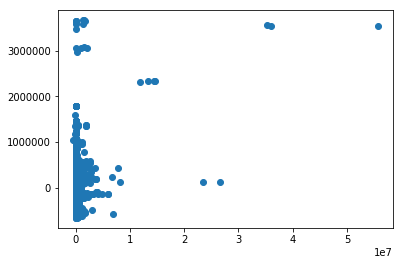

In [71]:
plt.scatter(y_test, predictions)

In [3]:
print lm.intercept_
print lm.coef_

NameError: name 'lm' is not defined

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
dtree = DecisionTreeClassifier()

In [75]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [76]:
predictions = dtree.predict(X_test)

In [15]:
from sklearn.metrics import classification_report, confusion_matrix

In [78]:
print confusion_matrix(y_test,predictions)
print '\n'
print classification_report(y_test, predictions)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


             precision    recall  f1-score   support

   -2569394       0.00      0.00      0.00         0
   -2546746       0.00      0.00      0.00         0
    -475001       0.00      0.00      0.00         1
    -450000       0.00      0.00      0.00         0
    -425000       0.00      0.00      0.00         1
    -165000       0.00      0.00      0.00         0
    -150000       0.00      0.00      0.00         1
    -129000       0.00      0.00      0.00         1
     -72160       0.00      0.00      0.00         1
      -8512       0.00      0.00      0.00         1
      -1662       0.00      0.00      0.00         1
      -1148       0.00      0.00      0.00         0
      -1138       0.00      0.00      0.00         0
       -462       0.00      0.00      0.00         1
       -127       0.00      0.00      0.00         1
       -118       0.00      0

In [22]:
from sklearn.ensemble import RandomForestClassifier

/anaconda2/lib/python2.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [38]:
rfc = RandomForestClassifier(n_estimators=2000)

In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [57]:
knn = KNeighborsClassifier(n_neighbors=1)

In [58]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [59]:
knn_pred = knn.predict(X_test)

In [60]:
print confusion_matrix(y_test,knn_pred)
print '\n'
print classification_report(y_test, knn_pred)

[[0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]]


             precision    recall  f1-score   support

    -475001       0.00      0.00      0.00         1
    -450000       0.00      0.00      0.00         0
    -449999       0.00      0.00      0.00         0
    -425000       0.00      0.00      0.00         1
    -165000       0.00      0.00      0.00         0
    -150000       0.00      0.00      0.00         1
    -131000       0.00      0.00      0.00         0
    -129000       0.00      0.00      0.00         1
     -72160       1.00      1.00      1.00         1
      -8512       0.00      0.00      0.00         1
      -2186       0.00      0.00      0.00         0
      -1662       0.00      0.00      0.00         1
      -1212       0.00      0.00      0.00         0
       -865       0.00      0.00      0.00         0
       -462       0.00      0.00      0.00         1
       -127       0.00      0

In [ ]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o',markerfacecolor='red',markersize=5)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
knn = KNeighborsClassifier(n_neighbors=29)
knn.fit(X_train,y_train)
pred_final = knn.predict(X_test)

In [ ]:
print confusion_matrix(y_test,pred_final)
print '\n'
print classification_report(y_test, pred_final)

In [38]:
# rfc.fit(X_train, y_train)
# rfc_pred = rfc.predict(X_test)

In [39]:
# print confusion_matrix(y_test,rfc_pred)
# print '\n'
# print classification_report(y_test, rfc_pred)

In [30]:
df1 = df_Budget[['Acct #','Amount', 'Year','Service Area']]

In [31]:
df1

,Acct #,Amount,Year,Service Area
0,58900,-2725474,2013,Human Services
1,58900,-550000,2013,Support Services
2,58900,-140000,2013,Public Safety
3,58900,-72160,2013,Human Services
4,51050,-1212,2013,Human Services
5,51050,-462,2013,Human Services
6,51050,-287,2013,Human Services
7,51200,1,2013,General Government
8,51210,1,2013,General Government
9,51250,1,2013,General Government


In [32]:
X1 = df1[['Acct #','Amount','Year']]
y1= df1['Service Area']

In [33]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.4, random_state=105)

In [34]:
dtree.fit(X_train1, y_train1)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [35]:
predictions = dtree.predict(X_test1)

In [36]:
print confusion_matrix(y_test1,predictions)
print '\n'
print classification_report(y_test1, predictions)

[[ 481    0    0   80  379    4  201   53]
 [   0   15    0    0    1    0    0    0]
 [   0    0    3    0    0    0    0    1]
 [  74    0    0  212  284    4  175   33]
 [ 362    0    0  269 2316   13  596  129]
 [  13    0    0    9   22   45   13    6]
 [ 195    0    0  169  744    9 1111  110]
 [  85    0    3   50  230   11  149  113]]


                       precision    recall  f1-score   support

   Community Services       0.40      0.40      0.40      1198
         Debt Service       1.00      0.94      0.97        16
            Education       0.50      0.75      0.60         4
   General Government       0.27      0.27      0.27       782
       Human Services       0.58      0.63      0.60      3685
Internal Service Fund       0.52      0.42      0.46       108
        Public Safety       0.49      0.48      0.48      2338
     Support Services       0.25      0.18      0.21       641

          avg / total       0.48      0.49      0.48      8772



In [39]:
rfc.fit(X_train1, y_train1)
rfc_pred = rfc.predict(X_test1)

In [40]:
print confusion_matrix(y_test1,rfc_pred)
print '\n'
print classification_report(y_test1, rfc_pred)

[[ 323    0    0   68  446    4  289   68]
 [   0   15    0    0    1    0    0    0]
 [   0    1    2    0    0    0    0    1]
 [  73    0    0   95  358    6  221   29]
 [ 321    0    1  227 2244   20  730  142]
 [  11    0    0    6   35   30   18    8]
 [ 178    0    0  159  892   10  971  128]
 [  76    1    2   42  270   13  204   33]]


                       precision    recall  f1-score   support

   Community Services       0.33      0.27      0.30      1198
         Debt Service       0.88      0.94      0.91        16
            Education       0.40      0.50      0.44         4
   General Government       0.16      0.12      0.14       782
       Human Services       0.53      0.61      0.57      3685
Internal Service Fund       0.36      0.28      0.31       108
        Public Safety       0.40      0.42      0.41      2338
     Support Services       0.08      0.05      0.06       641

          avg / total       0.40      0.42      0.41      8772



In [41]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train1,y_train1)
pred= knn.predict(X_test1)

In [42]:
print confusion_matrix(y_test1,pred)
print '\n'
print classification_report(y_test1, pred)

[[ 421    0    0   87  350    7  257   76]
 [   0   11    0    1    1    1    2    0]
 [   0    0    2    0    0    0    1    1]
 [  70    0    0  190  294    5  178   45]
 [ 272    2    0  287 2136   22  762  204]
 [   8    1    0    4   28   32   25   10]
 [ 179    2    1  219  757   22 1022  136]
 [  69    0    1   54  212    7  158  140]]


                       precision    recall  f1-score   support

   Community Services       0.41      0.35      0.38      1198
         Debt Service       0.69      0.69      0.69        16
            Education       0.50      0.50      0.50         4
   General Government       0.23      0.24      0.23       782
       Human Services       0.57      0.58      0.57      3685
Internal Service Fund       0.33      0.30      0.31       108
        Public Safety       0.42      0.44      0.43      2338
     Support Services       0.23      0.22      0.22       641

          avg / total       0.45      0.45      0.45      8772



In [43]:
error_rate2 = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train1,y_train1)
    pred_i = knn.predict(X_test1)
    error_rate2.append(np.mean(pred_i != y_test1))

Text(0,0.5,'Error Rate')

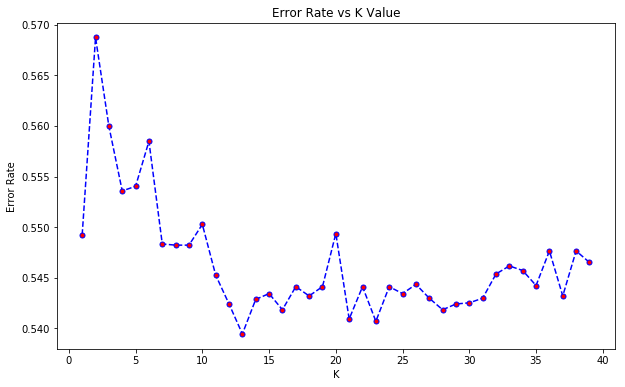

In [44]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate2, color='blue', linestyle='dashed', marker='o',markerfacecolor='red',markersize=5)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [53]:
knn = KNeighborsClassifier(n_neighbors=22)
knn.fit(X_train1,y_train1)
pred = knn.predict(X_test1)

print confusion_matrix(y_test1,pred)
print '\n'
print classification_report(y_test1, pred)

[[  39    0    0   13 1015    0  130    1]
 [   0    4    1    0    8    0    3    0]
 [   0    0    0    0    4    0    0    0]
 [  19    0    0   13  579    0  170    1]
 [  54    0    0   34 3089    0  505    3]
 [   1    0    3    0   75    0   29    0]
 [  30    0    2   38 1666    0  602    0]
 [   8    0    0    6  517    0  106    4]]


                       precision    recall  f1-score   support

   Community Services       0.26      0.03      0.06      1198
         Debt Service       1.00      0.25      0.40        16
            Education       0.00      0.00      0.00         4
   General Government       0.12      0.02      0.03       782
       Human Services       0.44      0.84      0.58      3685
Internal Service Fund       0.00      0.00      0.00       108
        Public Safety       0.39      0.26      0.31      2338
     Support Services       0.44      0.01      0.01       641

          avg / total       0.37      0.43      0.34      8772

